## What is the most commonly awarded gender and birth country?

In [3]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
#pd.set_option('display.max_columns', None)

df=pd.read_csv('nobel.csv')
top_country=df['birth_country'].value_counts().index[0]
top_gender=df['sex'].value_counts().index[0]
print(df)


     year    category                                              prize  \
0    1901   Chemistry                  The Nobel Prize in Chemistry 1901   
1    1901  Literature                 The Nobel Prize in Literature 1901   
2    1901    Medicine     The Nobel Prize in Physiology or Medicine 1901   
3    1901       Peace                         The Nobel Peace Prize 1901   
4    1901       Peace                         The Nobel Peace Prize 1901   
..    ...         ...                                                ...   
995  2023   Chemistry                  The Nobel Prize in Chemistry 2023   
996  2023   Chemistry                  The Nobel Prize in Chemistry 2023   
997  2023  Literature                 The Nobel Prize in Literature 2023   
998  2023       Peace                         The Nobel Peace Prize 2023   
999  2023   Economics  The Sveriges Riksbank Prize in Economic Scienc...   

                                            motivation prize_share  \
0    "in recognit

## Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?

0     0.017544
1     0.075000
2     0.074074
3     0.250000
4     0.302326
5     0.291667
6     0.265823
7     0.317308
8     0.319588
9     0.403846
10    0.422764
11    0.314050
12    0.360000
Name: laureate_id, dtype: float64


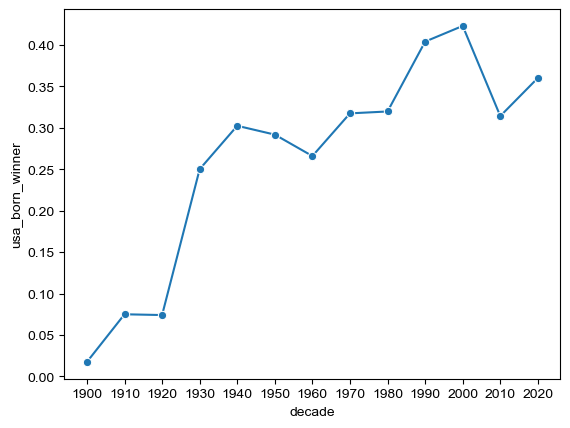

In [5]:
df_2=df.copy()
df_2['decade']=(df_2['year'] // 10) * 10
df_2['usa_born_winner'] = df_2['birth_country'] == 'United States of America'

us=df_2[df_2['birth_country']=='United States of America'].groupby('decade',as_index=False)['laureate_id'].count()
total=df_2.groupby('decade',as_index=False)['laureate_id'].count()
print(us['laureate_id']/total['laureate_id'])
max_decade_usa=2000

# Plotting USA born winners
g=sns.lineplot(x='decade', y='usa_born_winner', data=df_2, estimator='mean', errorbar=None, marker='o')
g.set(xticks=df_2['decade'].unique())
sns.set_style('whitegrid')


## Which decade and Nobel Prize category combination had the highest proportion of female laureates?

    decade    category  female_winner
0     1900   Chemistry       0.000000
1     1900  Literature       0.100000
2     1900    Medicine       0.000000
3     1900       Peace       0.071429
4     1900     Physics       0.076923
..     ...         ...            ...
67    2020   Economics       0.111111
68    2020  Literature       0.500000
69    2020    Medicine       0.125000
70    2020       Peace       0.285714
71    2020     Physics       0.166667

[72 rows x 3 columns]
    decade    category
68    2020  Literature


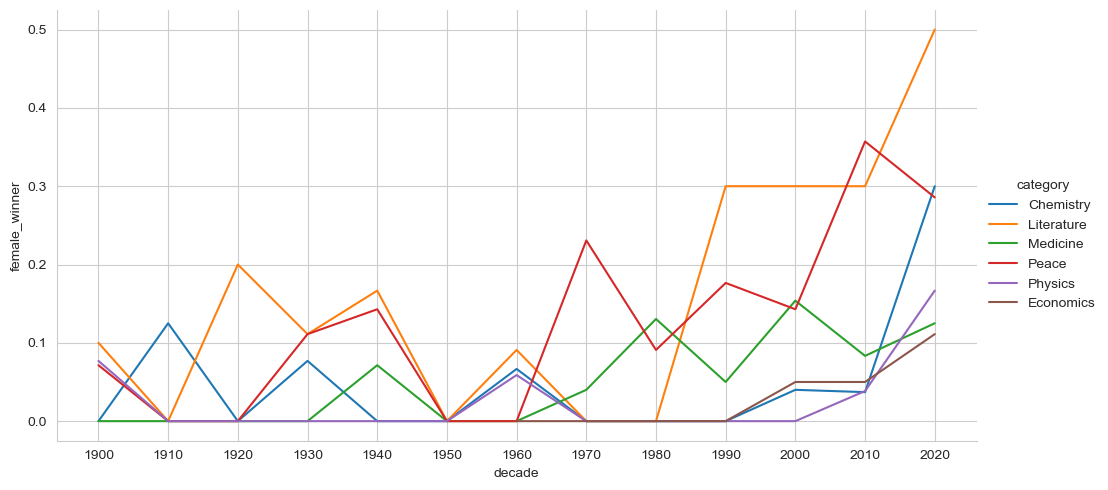

In [7]:
df_2['female_winner']=df_2['sex']=='Female'
proportion=df_2.groupby(['decade','category'],as_index=False)['female_winner'].mean()
sol=proportion[proportion['female_winner']==proportion['female_winner'].max()][['decade','category']]
#solution 2
#proportion=pd.pivot_table(df_2,values='female_winner',columns='decade',index='category')

print(proportion)
print(sol)
max_female_dict={sol['decade'].values[0]:sol['category'].values[0]}
# Plotting female winners with % winners on the y-axis
g = sns.relplot(x='decade', y='female_winner', hue='category', data=proportion, kind="line", height=5,     aspect=2   )
g.set(xticks=df_2['decade'].unique())


## Who was the first woman to receive a Nobel Prize, and in what category?

In [9]:
female_winners_sorted=df_2[df_2['sex']=='Female'].sort_values('year').loc[:,['full_name','category']]
first_woman_name=female_winners_sorted['full_name'].values[0]
first_woman_category=female_winners_sorted['category'].values[0]
print(first_woman_name)
print(first_woman_category)

Marie Curie, née Sklodowska
Physics


## Which individuals or organizations have won more than one Nobel Prize throughout the years?

[Text(0, 0, 'Comité international de la Croix Rouge (International Committee of the Red Cross)'),
 Text(1, 0, 'Linus Carl Pauling'),
 Text(2, 0, 'John Bardeen'),
 Text(3, 0, 'Frederick Sanger'),
 Text(4, 0, 'Marie Curie, née Sklodowska'),
 Text(5, 0, 'Office of the United Nations High Commissioner for Refugees (UNHCR)')]

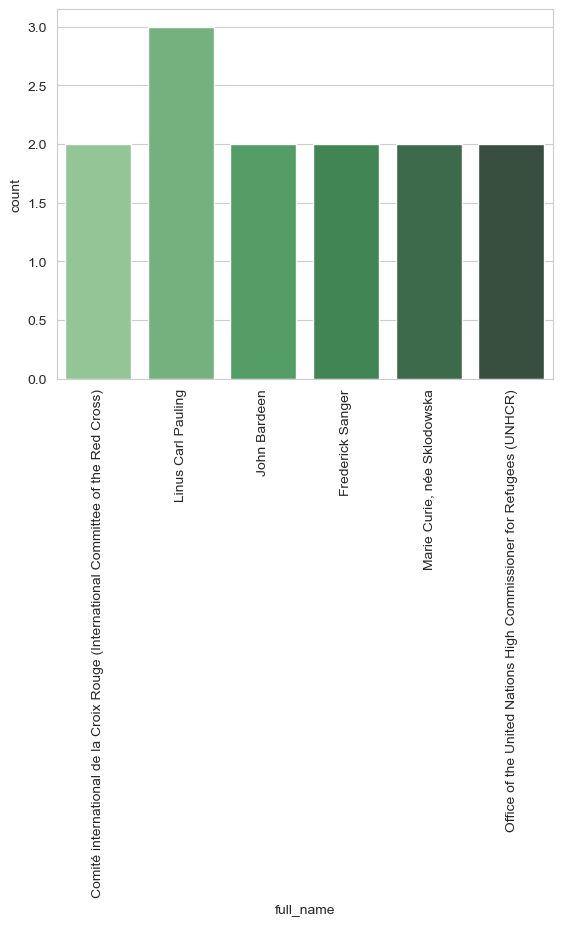

In [11]:
repeat_list = df['full_name'].value_counts()[df['full_name'].value_counts() > 1].index.tolist()
repeat_df = df[df['full_name'].isin(repeat_list)]

g = sns.countplot(x='full_name',hue='full_name', data=repeat_df, palette='Greens_d')
g.set_xticks(range(len(repeat_list)))

g.set_xticklabels(repeat_list, rotation=90)
